<div style="text-align:center; padding:30px; background:#fef7f1; border-radius:15px; box-shadow:0px 4px 8px rgba(0,0,0,0.1);">

  <h1 style="color:darkorange; font-family:Trebuchet MS; font-size:48px; margin-bottom:15px;">
    Hotel Booking Analysis
  </h1>

  <p style="color:#004080; font-size:20px; font-family:Calibri; line-height:1.6; max-width:900px; margin:auto;">
    This dataset contains booking information for a <b>city hotel</b> and a <b>resort hotel</b>.  
    It includes details such as <i>when the booking was made, length of stay, the number of guests 
    (adults, children, and babies), parking availability</i>, and more.  
    All personally identifying information has been removed.  
    <br><br>
    <span style="color:darkred; font-weight:bold;">Objective:</span> Explore and analyze the data 
    to discover key factors that influence hotel bookings.
  </p>

  <img src="hotel booking.avif" style="width:100%; max-height:500px; border-radius:20px; margin-top:25px; object-fit:cover;">

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:darkgreen; background-color:#eafbea; padding:10px; border-radius:8px; text-align:center;">
1. Data Loading and Initial Overview
</h2>

<p style="font-size:15px; color:#333;">
In this step, we import the dataset using <b>Pandas</b> and perform an initial exploration to understand its structure.
</p>

<ul style="font-size:14px; color:#444;">
  <li>Number of rows and columns</li>
  <li>Data types of each column</li>
  <li>Initial observations using <code>head()</code>, <code>info()</code>, and <code>describe()</code></li>
</ul>



In [2]:
Hotel_booking_df = pd.read_csv("D:/work/python/hotel_bookings.csv")

In [3]:
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
Hotel_booking_df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [5]:
#last 10 rows
Hotel_booking_df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
Hotel_booking_df.shape   # shape of the data

(119390, 32)

In [7]:
Hotel_booking_df.columns  # list of columns present in the data

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
Hotel_booking_df.info()    # overview of data with column values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
Hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h2 style="color:darkblue; background-color:#eef4ff; padding:10px; border-radius:8px; text-align:center; font-family:Trebuchet MS;">
2. Data Pre-processing
</h2>

<p style="font-size:15px; color:#333; font-family:Calibri;">
In this step, we clean and prepare the dataset for analysis by applying different pre-processing techniques.
</p>

<ul style="font-size:14px; color:#444; font-family:Calibri; line-height:1.6;">
  <li>Handling missing values</li>
  <li>Removing duplicates</li>
  <li>Correcting data types</li>
  <li>Creating derived columns</li>
  <li>Filtering or aggregating data</li>
</ul>


<h3 style="color:darkred; font-family:Verdana; text-decoration:underline;">
Handling Missing Values
</h3>

In [10]:
Hotel_booking_df.isna().sum().sort_values(ascending=False) # gives the count of null values


company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [11]:
#Replacing null values
# children (fill missing with 0 first, then convert to int)
Hotel_booking_df['children'] = Hotel_booking_df['children'].fillna(0).astype(int)

# company
Hotel_booking_df['company'] = Hotel_booking_df['company'].fillna(0).astype(int)

# agent
Hotel_booking_df['agent'] = Hotel_booking_df['agent'].fillna(0).astype(int)

# country
Hotel_booking_df['country'] = Hotel_booking_df['country'].fillna('Other')


In [12]:
Hotel_booking_df.isna().sum().sort_values(ascending=False) # gives the count of null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<h3 style="color:teal; font-family:Verdana; text-decoration:underline;">
Removing Duplicates
</h3>

In [13]:
Hotel_booking_df[Hotel_booking_df.duplicated()].shape 

(31994, 32)

In [14]:
Hotel_booking_df.drop_duplicates(inplace = True) 

In [15]:
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                            8739

In [16]:
Hotel_booking_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
Hotel_booking_df[Hotel_booking_df.adults + Hotel_booking_df.babies + Hotel_booking_df.children == 0].shape

(166, 32)

In [18]:
#Removing rows where total is 0.

In [19]:
Hotel_booking_df.drop(
    Hotel_booking_df[Hotel_booking_df.adults + Hotel_booking_df.babies + Hotel_booking_df.children == 0].index,
    inplace=True
)


In [20]:
Hotel_booking_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Correcting Datatypes
</h3>


In [21]:
# Convert date column to datetime
Hotel_booking_df['reservation_status_date'] = pd.to_datetime(
    Hotel_booking_df['reservation_status_date'], errors='coerce'
)

# Convert object columns to category
category_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]

Hotel_booking_df[category_cols] = Hotel_booking_df[category_cols].astype('category')

Hotel_booking_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  category      
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  category      
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Creating Derived Columns
</h3>


In [22]:
# Creating new columns
Hotel_booking_df['kids'] = Hotel_booking_df['children'] + Hotel_booking_df['babies']
Hotel_booking_df['Full_stay'] = Hotel_booking_df['stays_in_weekend_nights'] + Hotel_booking_df['stays_in_week_nights']


In [39]:
Hotel_booking_df['Total_members'] = Hotel_booking_df.adults + Hotel_booking_df.children + Hotel_booking_df.babies

In [23]:
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  category      
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  category      
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

<h3 style="color:purple; font-family:Verdana; text-decoration:underline;">
Filtering or Aggregating Data
</h3>

In [24]:
# Bookings with children
Hotel_booking_df[Hotel_booking_df['children'] > 0]



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,0,0,Transient,154.77,0,1,Check-Out,2015-07-05,1,4
45,Resort Hotel,1,47,2015,July,27,2,2,5,2,...,0,0,Transient,153.00,0,0,Canceled,2015-06-02,2,7
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,0,0,Transient,107.00,1,2,Check-Out,2015-07-03,2,1
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,0,Transient,153.00,1,0,Check-Out,2015-07-05,2,2
87,Resort Hotel,1,79,2015,July,27,3,6,15,2,...,0,0,Transient,108.73,0,2,Canceled,2015-04-15,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,0,0,Transient,135.00,0,2,Check-Out,2017-09-01,1,3
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,0,0,Transient,177.75,0,0,Check-Out,2017-09-02,1,6
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,0,0,Transient,189.00,0,3,Check-Out,2017-09-02,2,3
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,0,0,Transient,153.90,0,0,Check-Out,2017-09-03,1,5


In [25]:
# Bookings from Portugal (country = 'PRT')
Hotel_booking_df[Hotel_booking_df['country'] == 'PRT']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,0
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,0,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,0,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,0,Transient,82.00,0,1,Canceled,2015-05-06,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119317,City Hotel,0,188,2017,August,35,30,0,4,3,...,0,0,Transient,129.60,0,0,Check-Out,2017-09-03,0,4
119340,City Hotel,0,110,2017,August,35,29,0,5,2,...,0,0,Transient,171.00,0,2,Check-Out,2017-09-03,0,5
119357,City Hotel,0,47,2017,August,35,31,1,3,1,...,0,0,Transient,91.02,0,0,Check-Out,2017-09-04,0,4
119366,City Hotel,0,210,2017,August,35,28,2,5,2,...,0,0,Transient,85.59,0,1,Check-Out,2017-09-04,0,7


In [26]:
# Bookings with ADR (Average Daily Rate) greater than 200
Hotel_booking_df[Hotel_booking_df['adr'] > 200]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,Full_stay
140,Resort Hotel,0,44,2015,July,28,5,2,0,3,...,0,0,Transient,225.00,2,0,Check-Out,2015-07-07,0,2
164,Resort Hotel,0,81,2015,July,28,6,1,3,2,...,0,0,Transient,210.00,1,0,Check-Out,2015-07-10,2,4
303,Resort Hotel,0,79,2015,July,28,11,2,6,2,...,0,0,Transient,213.75,0,0,Check-Out,2015-07-19,2,8
396,Resort Hotel,0,317,2015,July,29,14,1,5,2,...,0,0,Transient,230.67,1,2,Check-Out,2015-07-20,2,6
412,Resort Hotel,0,37,2015,July,29,15,2,6,2,...,0,0,Transient,216.13,1,0,Check-Out,2015-07-23,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119339,City Hotel,0,110,2017,August,35,29,0,5,3,...,0,0,Transient,229.00,0,1,Check-Out,2017-09-03,0,5
119365,City Hotel,0,54,2017,August,35,27,3,5,1,...,0,0,Transient,266.75,0,1,Check-Out,2017-09-04,0,8
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,0,0,Transient,209.25,0,3,Check-Out,2017-09-04,0,6
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,0,0,Transient,209.00,0,0,Check-Out,2017-09-05,0,6


In [27]:
# Selecting only a few columns
Hotel_booking_df[['hotel', 'lead_time', 'adr']].head()

,hotel,lead_time,adr
0,Resort Hotel,342,0.0
1,Resort Hotel,737,0.0
2,Resort Hotel,7,75.0
3,Resort Hotel,13,75.0
4,Resort Hotel,14,98.0


In [29]:
# Average daily rate per hotel type
Hotel_booking_df.groupby('hotel', observed=True)['adr'].mean()

hotel
City Hotel      111.271969
Resort Hotel     99.059517
Name: adr, dtype: float64

In [32]:
# Total number of bookings per country
Hotel_booking_df.groupby('country', observed=True)['hotel'].count().sort_values(ascending=False)

country
PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
       ...  
MRT        1
SMR        1
SLE        1
UMI        1
VGB        1
Name: hotel, Length: 178, dtype: int64

In [30]:
# Average stay duration per customer type
Hotel_booking_df.groupby('customer_type', observed=True)['Full_stay'].mean()

customer_type
Contract           6.040829
Group              2.894640
Transient          3.577412
Transient-Party    3.329884
Name: Full_stay, dtype: float64

In [42]:
# Multiple aggregations: ADR stats & average stay duration per hotel type
Hotel_booking_df.groupby('hotel', observed=True).agg({
    'adr': ['mean', 'max', 'min'],
    'Full_stay': 'mean'
})

adr               Full_stay
                    mean     max   min      mean
hotel                                           
City Hotel    111.271969  5400.0  0.00  3.141945
Resort Hotel   99.059517   508.0 -6.38  4.391948

<h2 style="color:darkorange; font-family:Arial; text-align:center; text-decoration:underline;">
STEP 3: Exploratory Data Analysis (EDA)
</h2>

<ul style="font-size:16px; font-family:Verdana; color:darkslategray;">
  <li>Conduct descriptive and exploratory analysis to uncover <b>patterns and trends</b>.</li>
  <li>Perform <b>Univariate, Bivariate, and Multivariate</b> analysis.</li>
  <li>Use <b>groupby, pivot tables, and correlation analysis</b> for deeper insights.</li>
  <li>Include <b>statistical summaries</b> to support findings.</li>
</ul>


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Correlation
</h3>

In [40]:
Corr_df = Hotel_booking_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','Full_stay','Total_members']]

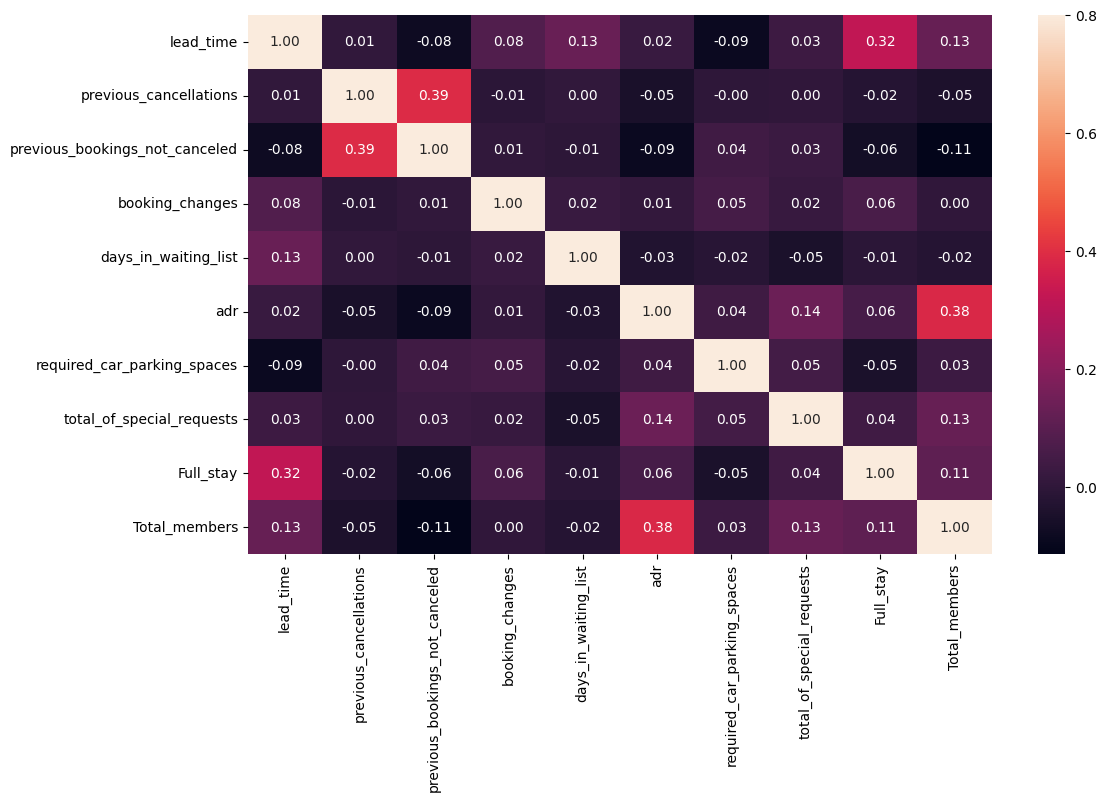

In [41]:
corr_mat = Corr_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr_mat,vmax=0.8,annot = True,fmt='.2f');

1-->Full_stay length and lead_time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival date.

2--> adr (Average daily rate) is slightly correlated with Total_members, which makes sense as more no. of people means more revenue, therefore more Average_daily_rate.

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Univariate
</h3>

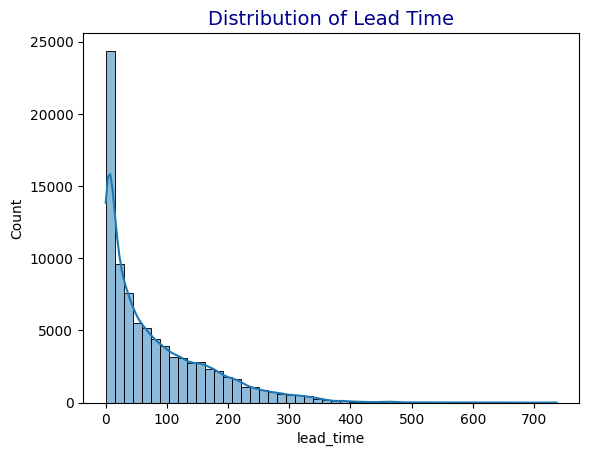

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of lead_time
sns.histplot(Hotel_booking_df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time", fontsize=14,color="darkblue")
plt.show()

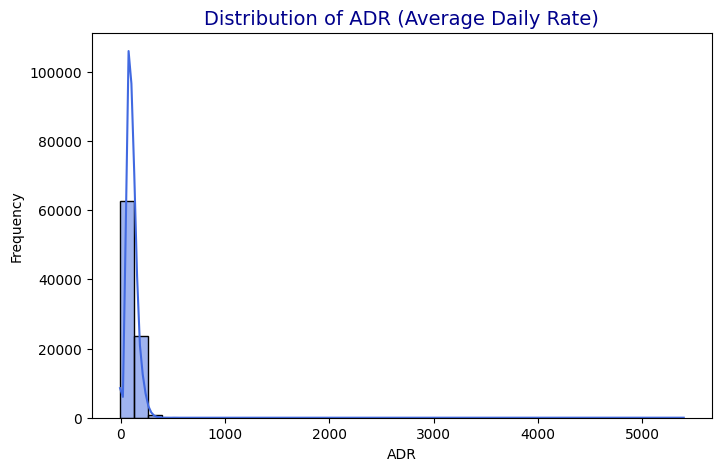

In [44]:
plt.figure(figsize=(8,5))
sns.histplot(Hotel_booking_df['adr'], bins=40, kde=True, color="royalblue")
plt.title("Distribution of ADR (Average Daily Rate)", fontsize=14, color="darkblue")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()

<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Bivariate
</h3>

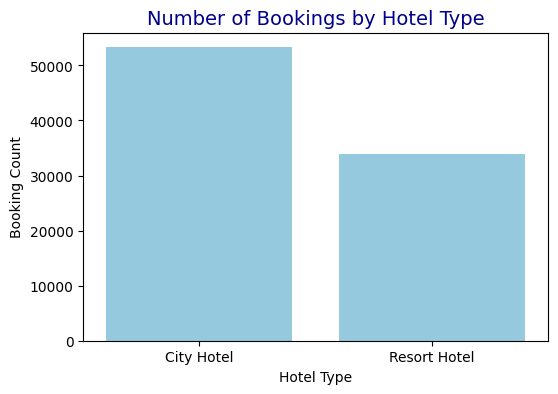

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', data=Hotel_booking_df, color="skyblue")
plt.title("Number of Bookings by Hotel Type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type")
plt.ylabel("Booking Count")
plt.show()


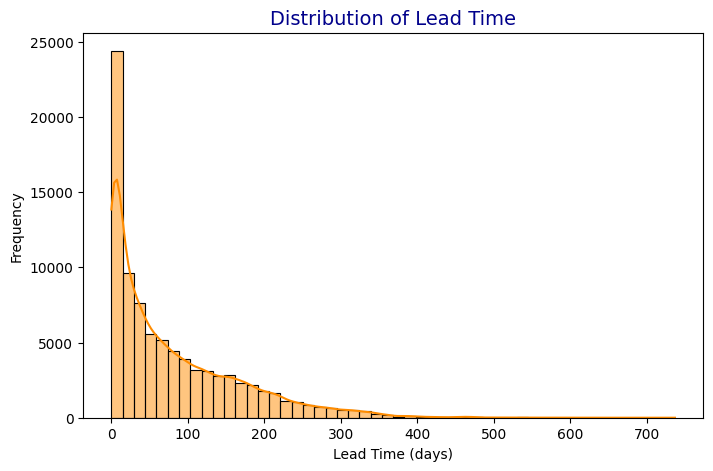

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(Hotel_booking_df['lead_time'], bins=50, kde=True, color="darkorange")
plt.title("Distribution of Lead Time", fontsize=14, color="darkblue")
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()


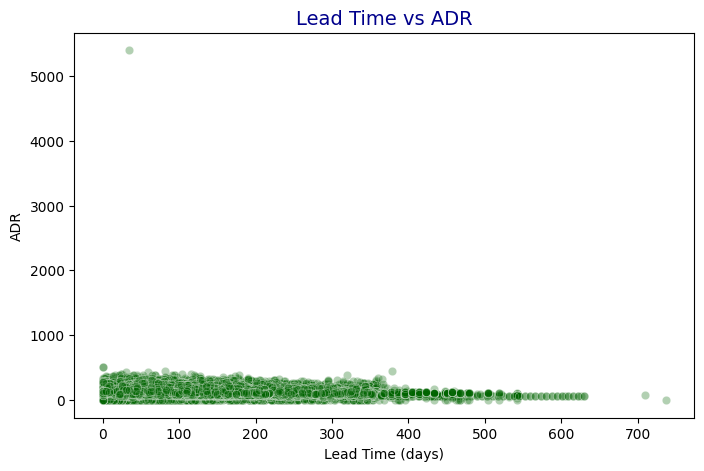

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='lead_time', y='adr', data=Hotel_booking_df, alpha=0.3, color="darkgreen")
plt.title("Lead Time vs ADR", fontsize=14, color="darkblue")
plt.xlabel("Lead Time (days)")
plt.ylabel("ADR")
plt.show()


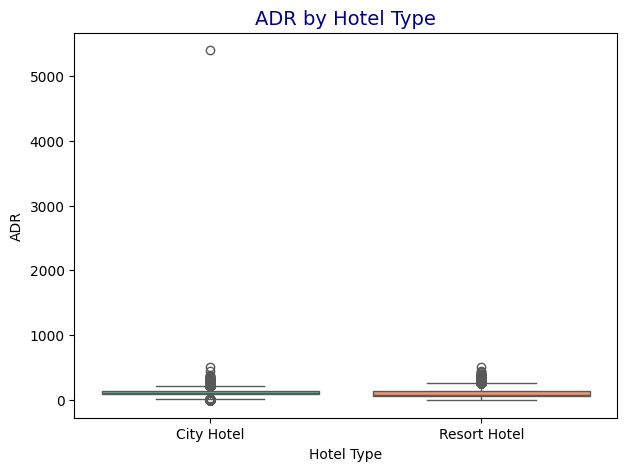

In [210]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hotel', y='adr', hue='hotel', data=Hotel_booking_df, palette="Set2", legend=False)
plt.title("ADR by Hotel Type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type")
plt.ylabel("ADR")
plt.show()

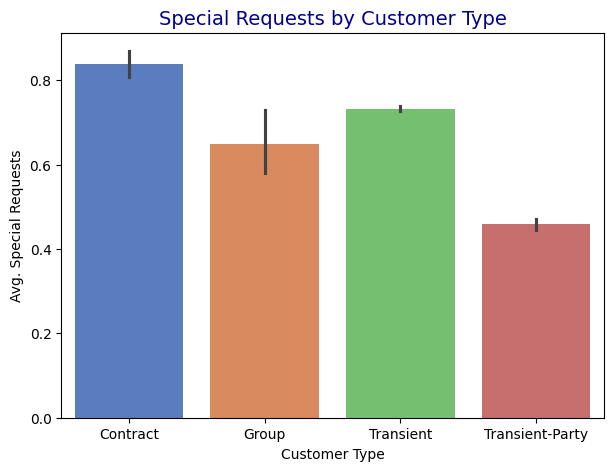

In [180]:
plt.figure(figsize=(7,5))
sns.barplot(
    x='customer_type', 
    y='total_of_special_requests', 
    hue='customer_type',
    data=Hotel_booking_df, 
    palette="muted",
    legend=False          
)
plt.title("Special Requests by Customer Type", fontsize=14,color="darkblue")
plt.xlabel("Customer Type")
plt.ylabel("Avg. Special Requests")
plt.show()




<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
Multivariate
</h3>

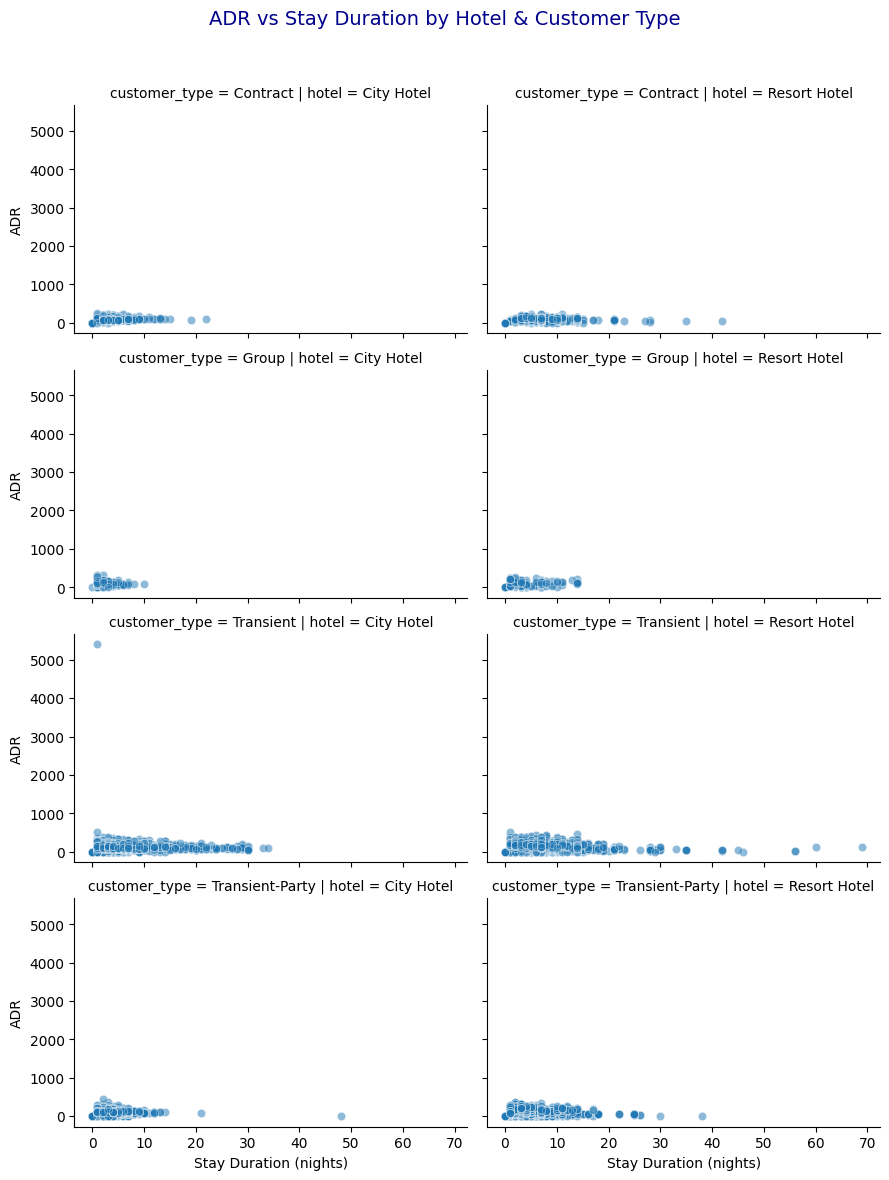

In [181]:
g = sns.FacetGrid(Hotel_booking_df, col="hotel", row="customer_type", height=3, aspect=1.5)
g.map(sns.scatterplot, "Full_stay", "adr", alpha=0.5)
g.set_axis_labels("Stay Duration (nights)", "ADR")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("ADR vs Stay Duration by Hotel & Customer Type",fontsize=14, color="darkblue")
plt.show()


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
groupby, pivot tables, and correlation analysis
</h3>

In [ ]:
Hotel_booking_df.groupby(['hotel', 'customer_type'], observed=True)['adr'].mean().reset_index()

In [61]:
pd.pivot_table(
    Hotel_booking_df,
    values='adr',
    index='hotel',
    columns='customer_type',
    aggfunc='mean',
    observed=True
)



customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,107.854431,93.995874,114.291857,93.485383
Resort Hotel,79.693843,75.741213,103.806792,79.567224


In [62]:
Hotel_booking_df.groupby(['hotel', 'customer_type'], observed=True)['Full_stay'].mean().reset_index()


,hotel,customer_type,Full_stay
0,City Hotel,Contract,3.158828
1,City Hotel,Group,2.524164
2,City Hotel,Transient,3.195050
3,City Hotel,Transient-Party,2.825114
4,Resort Hotel,Contract,8.575540
5,Resort Hotel,Group,3.261029
6,Resort Hotel,Transient,4.200073
7,Resort Hotel,Transient-Party,4.087254


<h3 style="color:darkgreen; font-family:Verdana; text-decoration:underline;">
 Statistical Summaries (EDA)
</h3>

In [66]:
# ===========================
# Statistical Summaries (EDA)
# ===========================

print("\n🔹 Summary of Numerical Columns:")
display(Hotel_booking_df.describe().T)

# Check if there are any categorical columns left
cat_cols = Hotel_booking_df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    print("\n🔹 Summary of Categorical Columns:")
    display(Hotel_booking_df[cat_cols].describe().T)
else:
    print("\nNo categorical (object) columns available after preprocessing.")

print("\n🔹 Top 10 Countries by Bookings:")
display(Hotel_booking_df['country'].value_counts().head(10))

print("\n🔹 Skewness & Kurtosis (Numerical Features):")
display(
    Hotel_booking_df[['lead_time','adr','Full_stay']]
    .agg(['mean','median','std','skew','kurt'])
)

print("\n🔹 Correlation with ADR:")
display(
    Hotel_booking_df.corr(numeric_only=True)['adr']
    .sort_values(ascending=False)
)



🔹 Summary of Numerical Columns:


,count,mean,min,25%,50%,75%,max,std
is_canceled,87230.0,0.275238,0.0,0.0,0.0,1.0,1.0,0.446637
lead_time,87230.0,79.971019,0.0,11.0,49.0,125.0,737.0,86.058683
arrival_date_year,87230.0,2016.210352,2015.0,2016.0,2016.0,2017.0,2017.0,0.686064
arrival_date_week_number,87230.0,26.835091,1.0,16.0,27.0,37.0,53.0,13.669216
arrival_date_day_of_month,87230.0,15.815832,1.0,8.0,16.0,23.0,31.0,8.835545
stays_in_weekend_nights,87230.0,1.004609,0.0,0.0,1.0,2.0,19.0,1.027408
stays_in_week_nights,87230.0,2.623925,0.0,1.0,2.0,4.0,50.0,2.03983
adults,87230.0,1.879365,0.0,2.0,2.0,2.0,55.0,0.621724
children,87230.0,0.138897,0.0,0.0,0.0,0.0,10.0,0.456265
babies,87230.0,0.010845,0.0,0.0,0.0,0.0,10.0,0.113704



No categorical (object) columns available after preprocessing.

🔹 Top 10 Countries by Bookings:


country
PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64


🔹 Skewness & Kurtosis (Numerical Features):


,lead_time,adr,Full_stay
mean,79.971019,106.518031,3.628534
median,49.000000,98.200000,3.000000
std,86.058683,54.891227,2.742948
skew,1.430752,11.017880,2.947274
kurt,2.123263,992.178253,23.705306



🔹 Correlation with ADR:


adr                               1.000000
Total_members                     0.382210
children                          0.326359
kids                              0.320980
adults                            0.241996
arrival_date_year                 0.176594
total_of_special_requests         0.137461
is_canceled                       0.127233
arrival_date_week_number          0.099092
Full_stay                         0.056102
stays_in_week_nights              0.055084
stays_in_weekend_nights           0.040417
required_car_parking_spaces       0.038733
babies                            0.023206
arrival_date_day_of_month         0.022682
lead_time                         0.021948
booking_changes                   0.010144
agent                             0.007283
days_in_waiting_list             -0.032522
previous_cancellations           -0.050359
previous_bookings_not_canceled   -0.086052
company                          -0.138748
is_repeated_guest                -0.149432
Name: adr, 

<h2 style="color:darkorange; font-family:Arial; text-align:center; text-decoration:underline;">
STEP 3: Visualizations
</h2>

<ul style="font-size:16px; font-family:Verdana; color:darkslategray;">
  <li>Use Matplotlib / Seaborn / Plotly to generate meaningful visualizations:</li>
  <li>Bar plots, line charts, pie charts, histograms, box plots, scatter plots, heatmaps, etc </li>
  <li>Ensure visuals should have proper titles, labels, legends, and color schemes</li>
  <li> Use subplots where applicable for better layout </li>
</ul>

<h3 style="color:darkblue"; >
Hotel Booking by type
</h3>

Text(0, 0.5, 'Count')

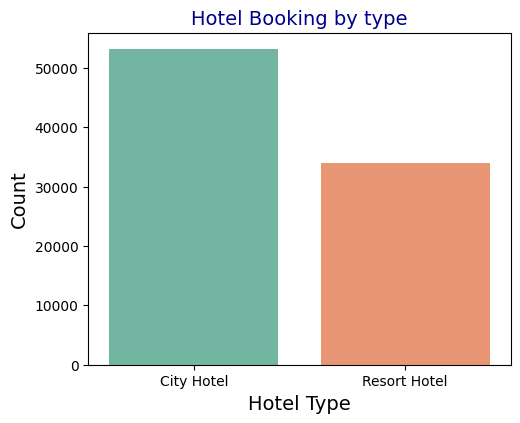

In [208]:
plt.figure(figsize=(12, 25))
plt.subplot(5, 2, 1)
sns.countplot(x='hotel', hue='hotel', data=Hotel_booking_df, palette="Set2", legend=False)
plt.title("Hotel Booking by type", fontsize=14, color="darkblue")
plt.xlabel("Hotel Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

<h6 style="color:darkblue"; >
City hotels received significantly more bookings than resort hotels, showing they are the preferred choice for guests.
</h6>

<h3 style="color:darkblue"; >
Rate Trend Over Months
</h3>

Text(0, 0.5, 'ADR')

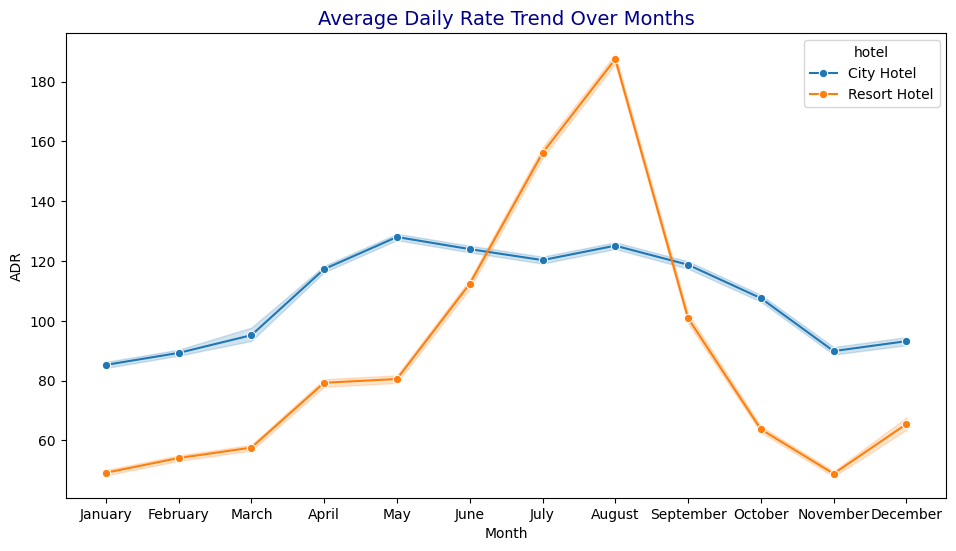

In [183]:
plt.figure(figsize=(25,35))
plt.subplot(5, 2, 2)
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=Hotel_booking_df, marker="o")
plt.title("Average Daily Rate Trend Over Months",fontsize=14, color="darkblue")
plt.xlabel("Month")
plt.ylabel("ADR")


<h6 style="color:darkblue"; >
Resort hotels have the highest rates in July and August, while city hotel rates stay steady across the months.
</h6>

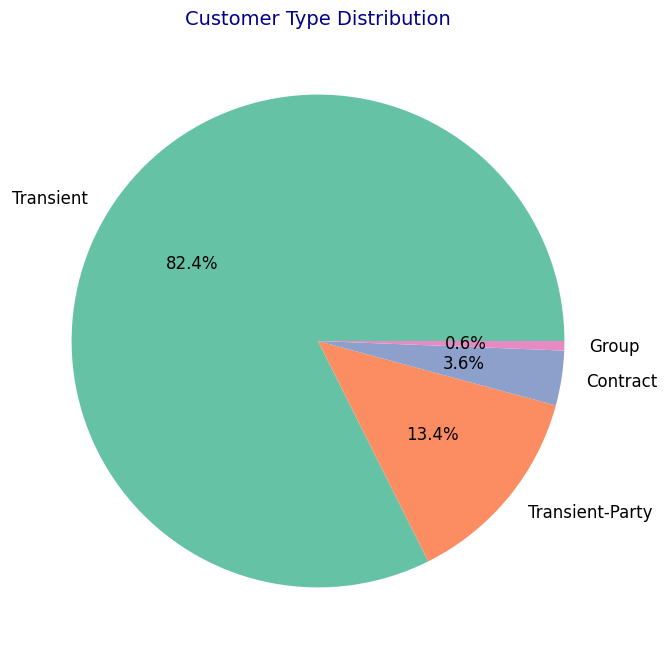

In [184]:
customer_type_counts = Hotel_booking_df['customer_type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("Set2"), textprops={'fontsize': 12})
plt.title("Customer Type Distribution",fontsize=14, color="darkblue")
plt.show()

<h6 style="color:darkblue"; >
The majority of customers are Transient (82.4%), followed by Transient-Party (13.4%), while Contract (3.6%) and Group (0.6%) bookings are very rare.
</h6>

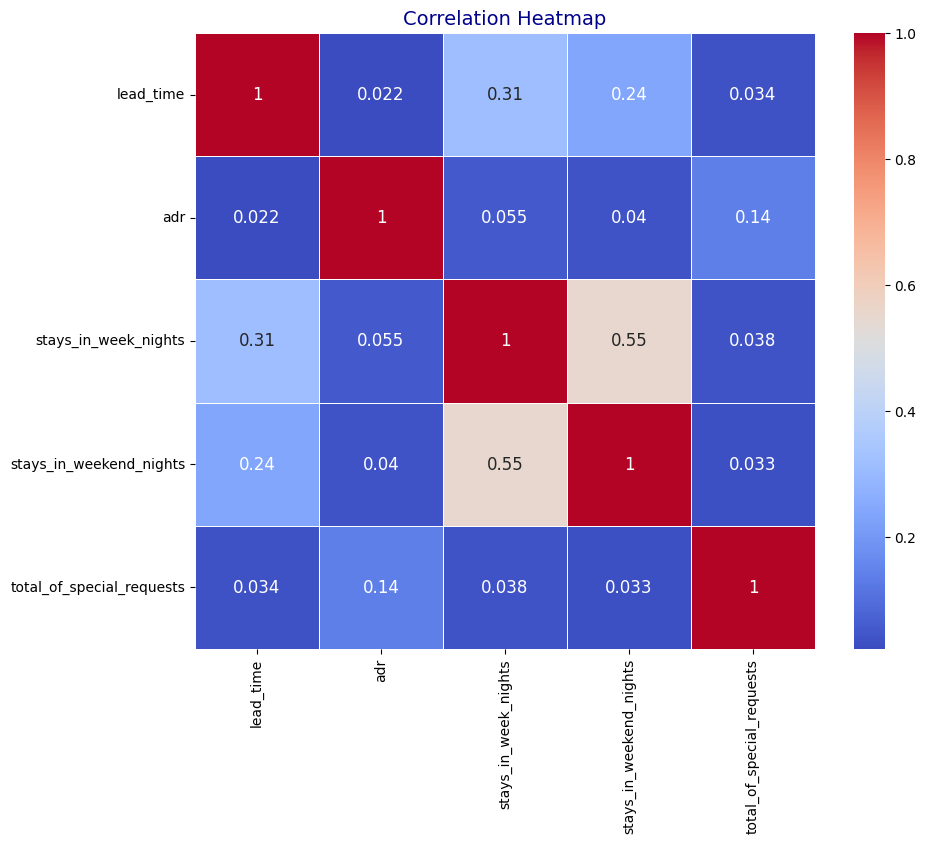

In [185]:
plt.figure(figsize=(10,8))
corr = Hotel_booking_df[['lead_time','adr','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, annot_kws={"size":12})
plt.title("Correlation Heatmap",fontsize=14, color="darkblue")
plt.show()

<h6 style="color:darkblue"; >
This correlation heatmap shows relationships between different hotel booking variables:

Strongest correlation: stays_in_week_nights and stays_in_weekend_nights (0.55) → People who stay longer on weekdays also tend to stay longer on weekends.

Moderate correlation: lead_time with stays_in_week_nights (0.31) → Longer lead times are slightly associated with longer weekday stays.

Weak correlations: Most other relationships are very weak (<0.15), meaning variables like adr (average daily rate) and special requests don’t strongly relate to stay durations or lead time.
</h6>

<h3 style="color:darkblue"; >
Total Bookings per Year
</h3>

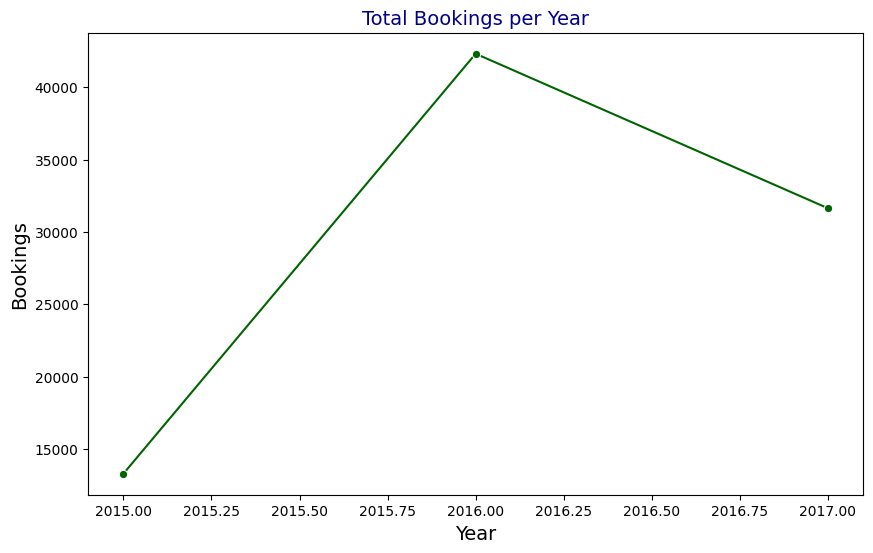

In [186]:
plt.figure(figsize=(10,6))
yearly_bookings = Hotel_booking_df.groupby('arrival_date_year')['hotel'].count().reset_index()
sns.lineplot(x='arrival_date_year', y='hotel', data=yearly_bookings, marker="o", color="darkgreen")
plt.title("Total Bookings per Year",fontsize=14, color="darkblue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Bookings", fontsize=14)
plt.show()

<h6 style="color:darkblue"; >
The chart shows that bookings sharply increased from 2015 to 2016, then slightly dropped in 2017.
</h6>

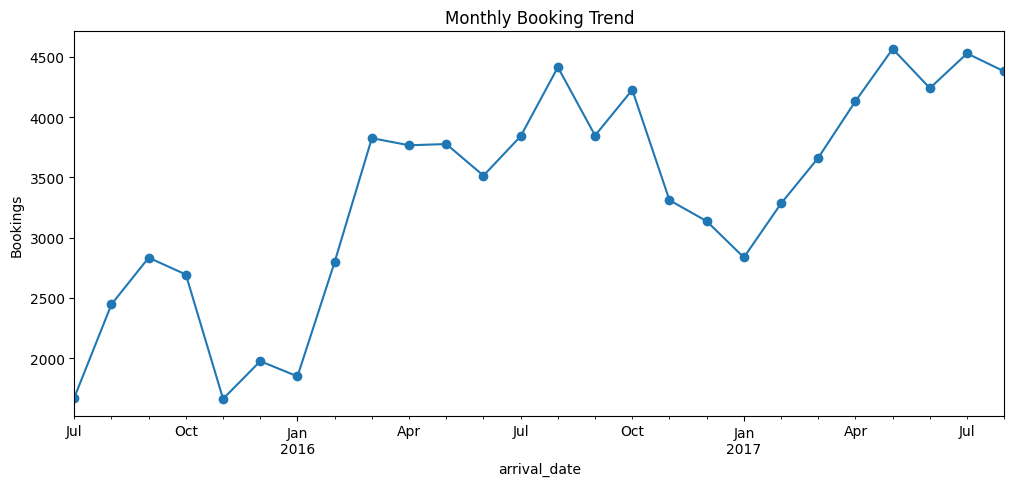

In [214]:
# Make sure month is converted to number
Hotel_booking_df['arrival_date_month'] = pd.to_datetime(
    Hotel_booking_df['arrival_date_month'], format='%B'
).dt.month

# Create arrival_date column
Hotel_booking_df['arrival_date'] = pd.to_datetime(
    dict(year=Hotel_booking_df['arrival_date_year'],
         month=Hotel_booking_df['arrival_date_month'],
         day=Hotel_booking_df['arrival_date_day_of_month'])
)

# Monthly booking trend
monthly = Hotel_booking_df.groupby(Hotel_booking_df['arrival_date'].dt.to_period('M')).size()

monthly.plot(figsize=(12,5), marker='o', title="Monthly Booking Trend")
plt.ylabel("Bookings")
plt.show()



<h6 style="color:darkblue"; >
The monthly booking trend shows clear fluctuations, with certain months receiving significantly higher bookings compared to others.
</h6>

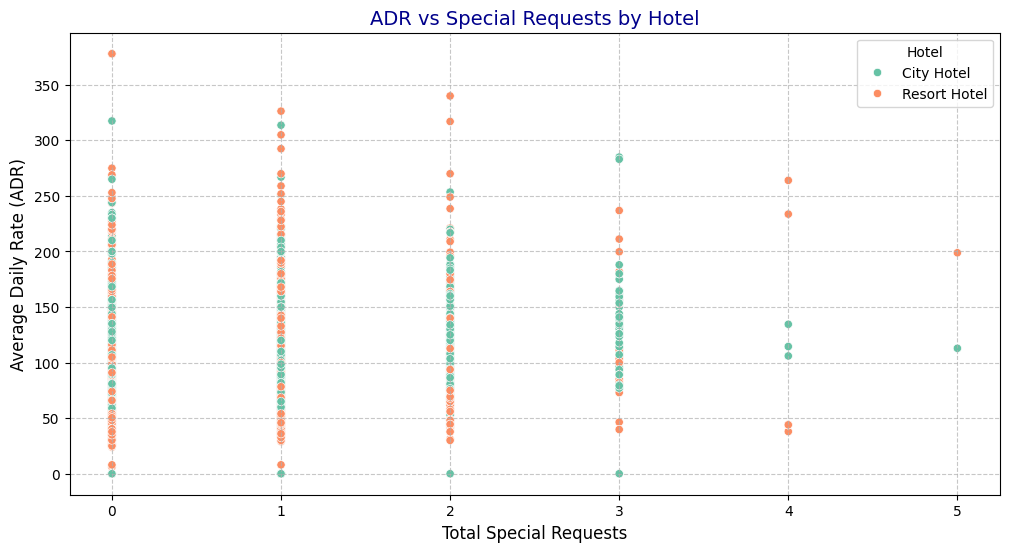

In [187]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=Hotel_booking_df.sample(2000, random_state=42), 
    x='total_of_special_requests', 
    y='adr', 
    hue='hotel',
    palette="Set2"
)
plt.title("ADR vs Special Requests by Hotel", fontsize=14, color="darkblue")
plt.xlabel("Total Special Requests", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.legend(title="Hotel")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h6 style="color:darkblue"; >
Guests with more special requests tend to have a higher Average Daily Rate (ADR), especially in Resort Hotels, while City Hotels show a steadier ADR across request levels.
</h6>

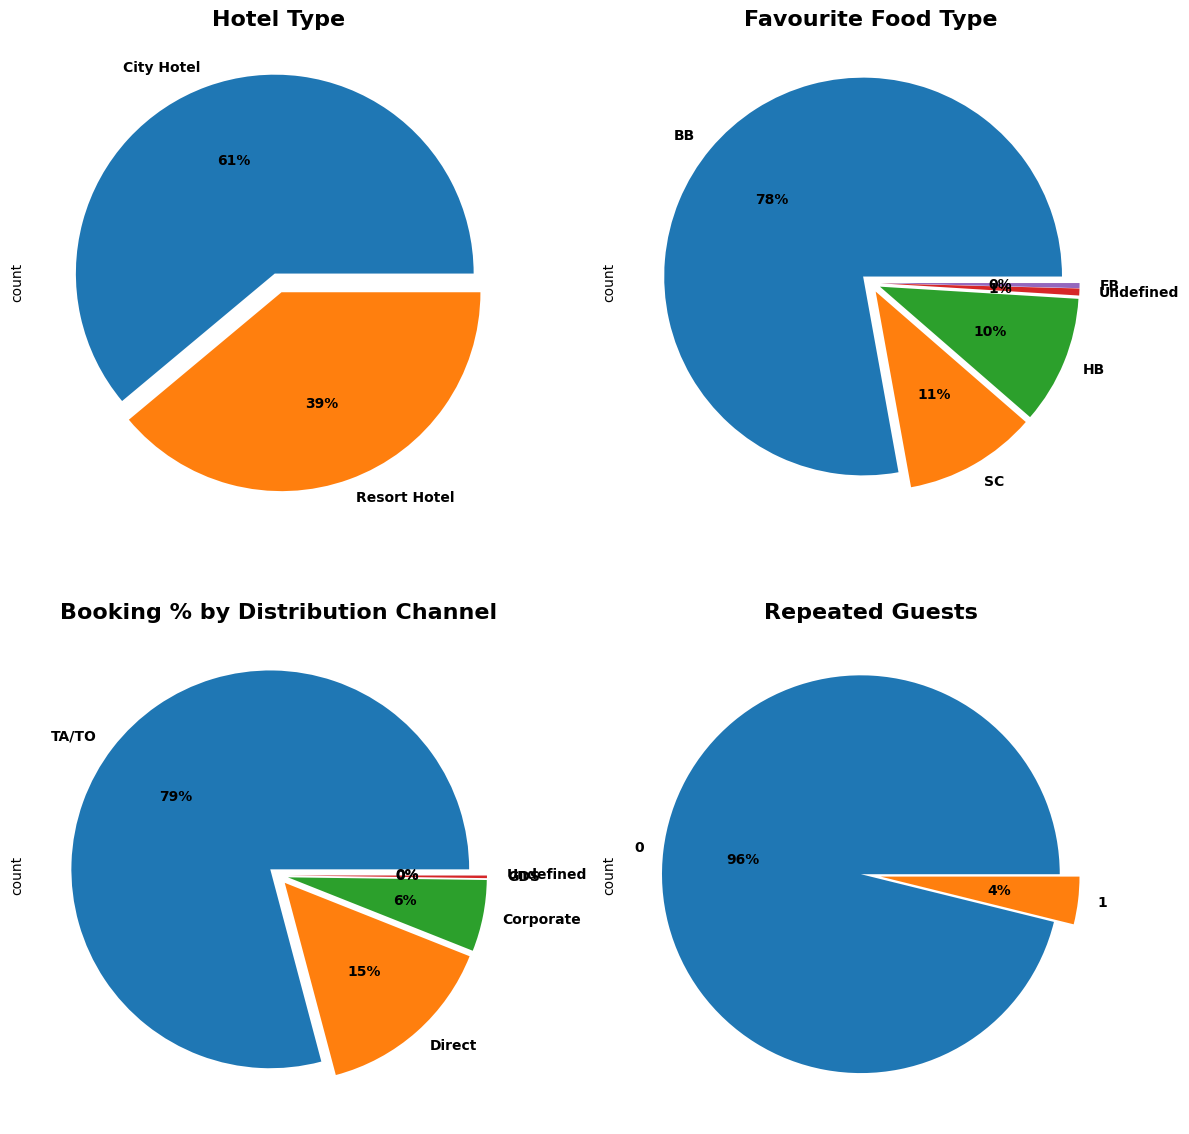

In [190]:
# Data for pie charts
pie_data = {
    "Hotel Type": Hotel_booking_df['hotel'].value_counts(),
    "Favourite Food Type": Hotel_booking_df['meal'].value_counts(),
    "Booking % by Distribution Channel": Hotel_booking_df['distribution_channel'].value_counts(),
    "Repeated Guests": Hotel_booking_df['is_repeated_guest'].value_counts()
}
# Explode settings
explode_settings = {
    "Hotel Type": [0.05, 0.05],
    "Favourite Food Type": [0.05]*5,
    "Booking % by Distribution Channel": [0.05]*len(Hotel_booking_df['distribution_channel'].value_counts()),
    "Repeated Guests": [0.05, 0.05]
}
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, (title, data) in zip(axes.flatten(), pie_data.items()):
    data.plot.pie(
        autopct='%1.0f%%',
        textprops={'weight': 'bold'},
        explode=explode_settings[title],
        ax=ax
    )
    ax.set_title(title, fontweight="bold", size=16)

plt.tight_layout()
plt.show()



<h6 style="color:darkblue"; >
1-->As we can see 61% are city hotels and 39% are resort hotels

2-->BB --bed and breakfast. HB--half board (in which breakfast and dinner are included.) FB--full board (in which breakfast, lunch and dinner are included.)

AS we can see 78% of people prefer 'BB' type meal.

3-->Most 79% people prefer'TA/TO' for booking

4-->only 4% people are repeated guests. The guest retention rate is very low.
</h6>

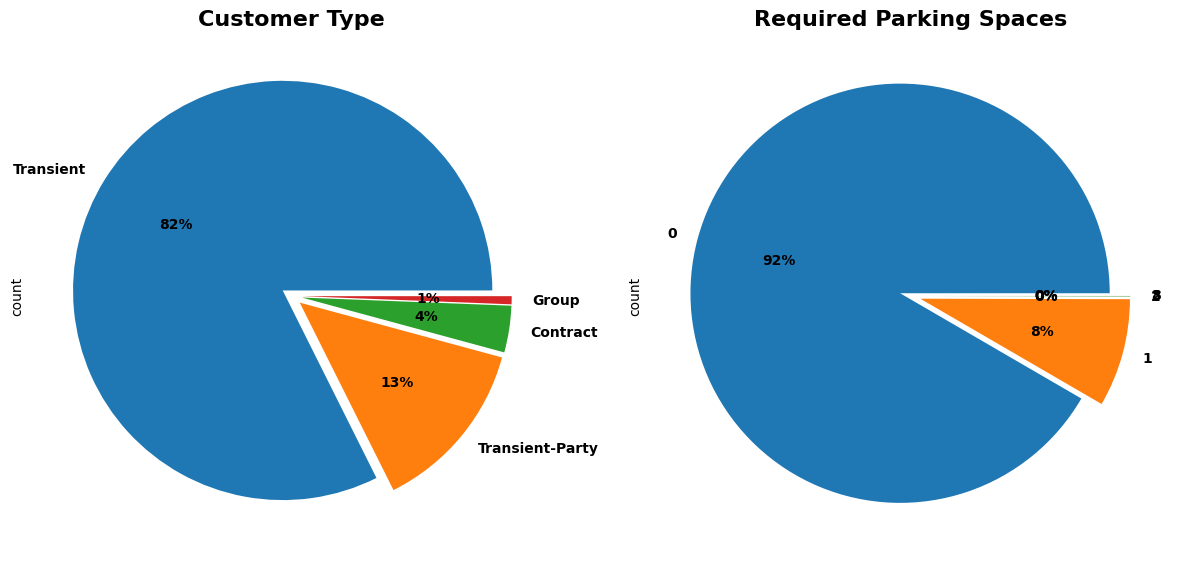

In [87]:
# Data for pie charts
pie_data = {
    "Customer Type": Hotel_booking_df['customer_type'].value_counts(),
    "Required Parking Spaces": Hotel_booking_df['required_car_parking_spaces'].value_counts()
}
# Explode settings
explode_settings = {
    "Customer Type": [0.05] * pie_data["Customer Type"].nunique(),
    "Required Parking Spaces": [0.05] * pie_data["Required Parking Spaces"].nunique()
}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, data) in zip(axes.flatten(), pie_data.items()):
    data.plot.pie(
        autopct='%1.0f%%',
        textprops={'weight': 'bold'},
        explode=explode_settings[title],
        ax=ax
    )
    ax.set_title(title, fontweight="bold", size=16)

plt.tight_layout()
plt.show()



<h6 style="color:darkblue"; >
1-->There are 4 types of Customer. Out of them most are 'Transient Type"

2-->only 8% people require parking spaces
</h6>

Hotel Wise Bookings based on Date Month and year

In [90]:
Hotel_booking_df['arrival_date_month'].value_counts()

arrival_date_month
August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: count, dtype: int64

In [91]:
# Filter only Resort Hotel bookings
Resort_df = Hotel_booking_df[Hotel_booking_df['hotel'] == 'Resort Hotel']

# Count bookings by month
Resort_df['arrival_date_month'].value_counts()

arrival_date_month
August       4666
July         4313
May          2942
April        2828
June         2759
October      2724
March        2656
February     2492
September    2450
December     2114
November     2051
January      1961
Name: count, dtype: int64

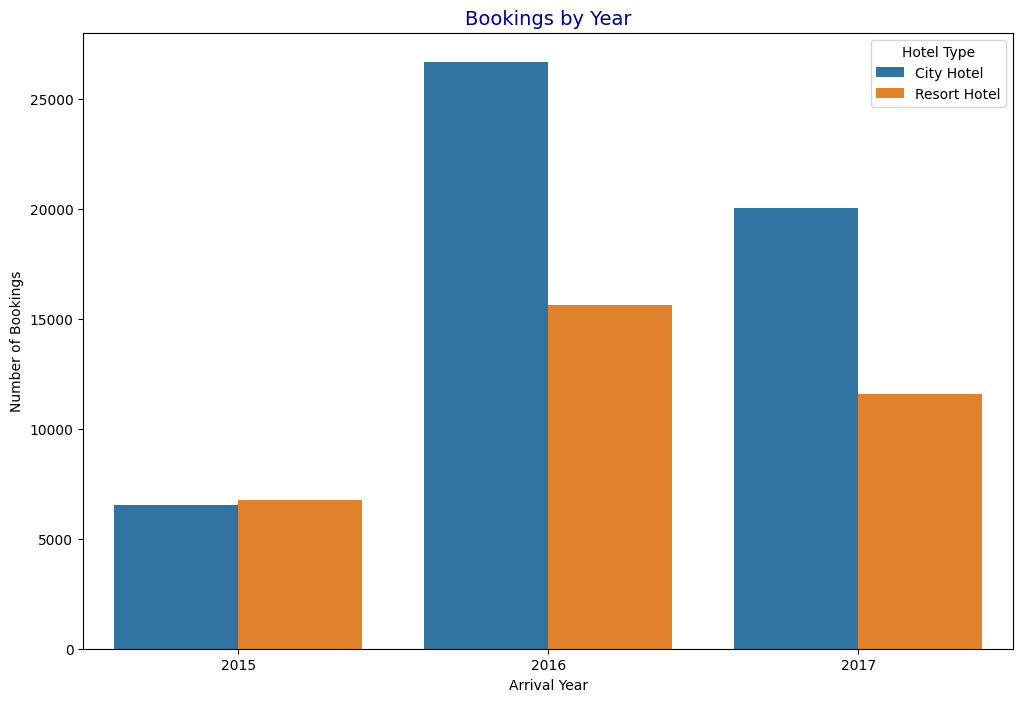

In [191]:

# Plot bookings by year and hotel type
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_year', data=Hotel_booking_df, hue='hotel')
plt.title('Bookings by Year', fontsize=14, color="darkblue")
plt.xlabel("Arrival Year")
plt.ylabel("Number of Bookings")
plt.legend(title="Hotel Type")
plt.show()


<h6 style="color:darkblue"; >
1-->Bookings for city hotels are higher than resort hotels over the years and in year 2016 the bookings for both the hotels were maximum.

2-->Most bookings were done in the month of May,June, July, August.
</h6>

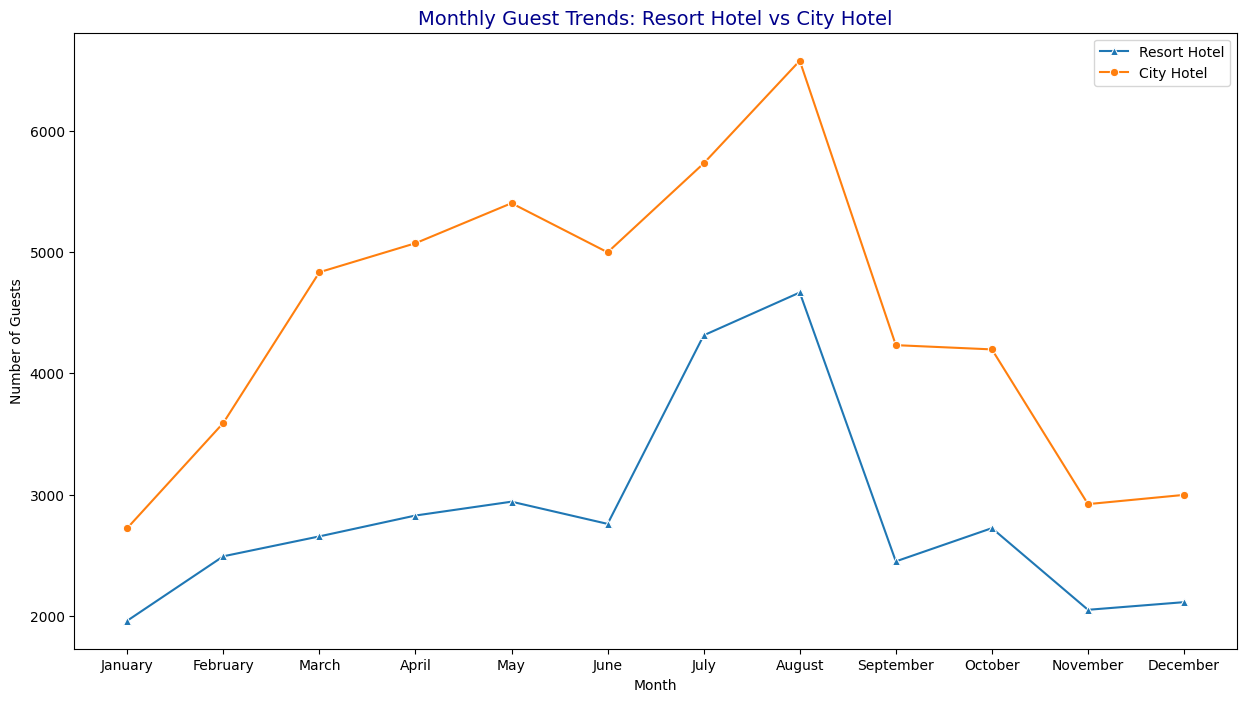

In [192]:
# Split dataset by hotel type
Resort_df = Hotel_booking_df[Hotel_booking_df['hotel'] == 'Resort Hotel']
City_df = Hotel_booking_df[Hotel_booking_df['hotel'] == 'City Hotel']

# Resort guest count by month
resort_guest = Resort_df['arrival_date_month'].value_counts().reset_index()
resort_guest.columns = ['month', 'no of guests']

# City guest count by month
city_guest = City_df['arrival_date_month'].value_counts().reset_index()
city_guest.columns = ['month', 'no of guests']

# Merge Resort & City data month-wise
final_guest = resort_guest.merge(city_guest, on='month')
final_guest.columns = ['month', 'no of guests in resort', 'no of guests in city hotel']

# Ensure months are ordered correctly
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)

# Sort by month order
final_guest = final_guest.sort_values('month')

# Plot visitors trend
plt.figure(figsize=(15,8))
sns.lineplot(data=final_guest, x='month', y='no of guests in resort', marker='^', label="Resort Hotel")
sns.lineplot(data=final_guest, x='month', y='no of guests in city hotel', marker='o', label="City Hotel")

plt.title("Monthly Guest Trends: Resort Hotel vs City Hotel",fontsize=14, color="darkblue")
plt.xlabel("Month")
plt.ylabel("Number of Guests")
plt.legend()
plt.show()


<h6 style="color:darkblue"; >
As we have seen above the busiest months for both the hotels are May,june ,july,August.
</h6>

<h3 style="color:darkblue"; >
From Where the most guests are coming ????
</h3>

Text(0.5, 1.0, 'Number of bookings country wise')

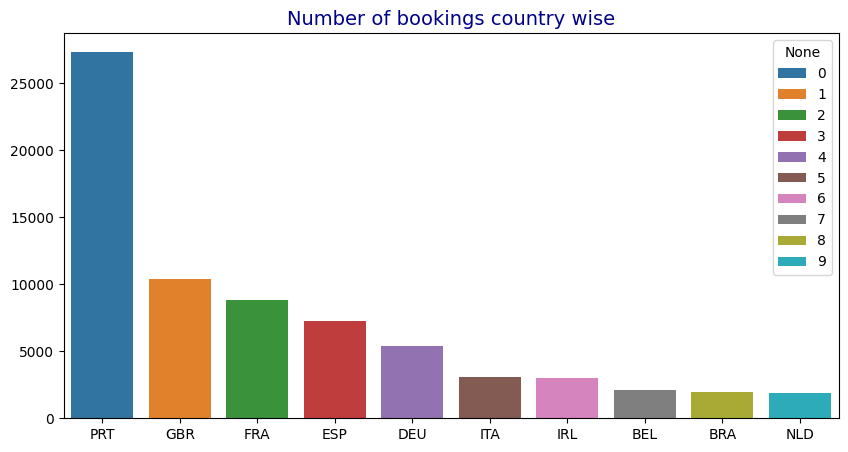

In [193]:
plt.figure(figsize = (10,5)) 
sns.barplot (y= list(Hotel_booking_df.country.value_counts().head (10)), x= list(Hotel_booking_df.country.value_counts().head(10).index),hue=top_countries.index,palette="tab10")
plt.title("Number of bookings country wise",fontsize=14, color="darkblue")



<h6 style="color:darkblue"; >
Most guest are from Portugal and other Europian contries.
</h6>

<h3 style="color:darkblue"; >
Adults and kids
</h3>

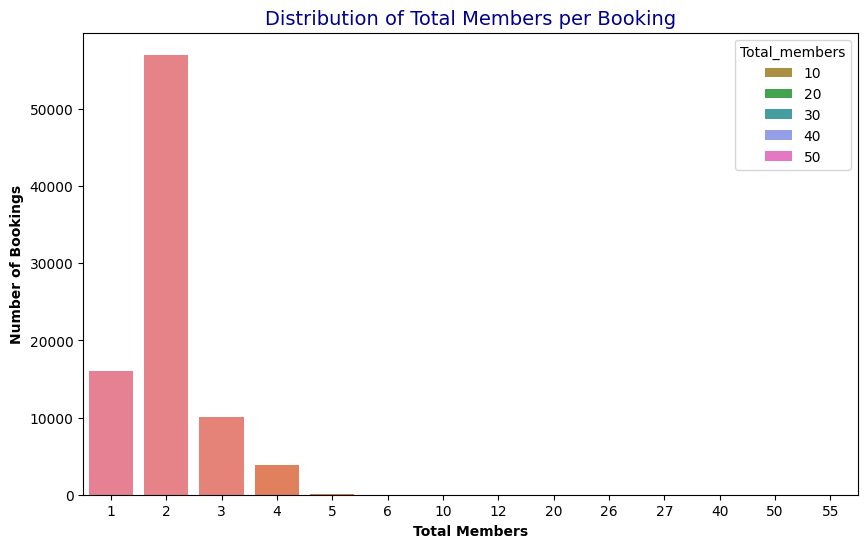

In [211]:

plt.figure(figsize=(10,6))
sns.countplot(
    x='Total_members', 
    data=Hotel_booking_df, 
    hue='Total_members',       # ✅ Assign x also to hue
    palette='husl'
)
plt.title("Distribution of Total Members per Booking",fontsize=14, color="darkblue")
plt.xlabel("Total Members", fontweight="bold")
plt.ylabel("Number of Bookings", fontweight="bold")
plt.show()




<h6 style="color:darkblue"; >
Most guests prefer to come as pair of 2 Adults.
</h6>

<h3 style="color:darkblue"; >
Most preferred Room type
</h3>

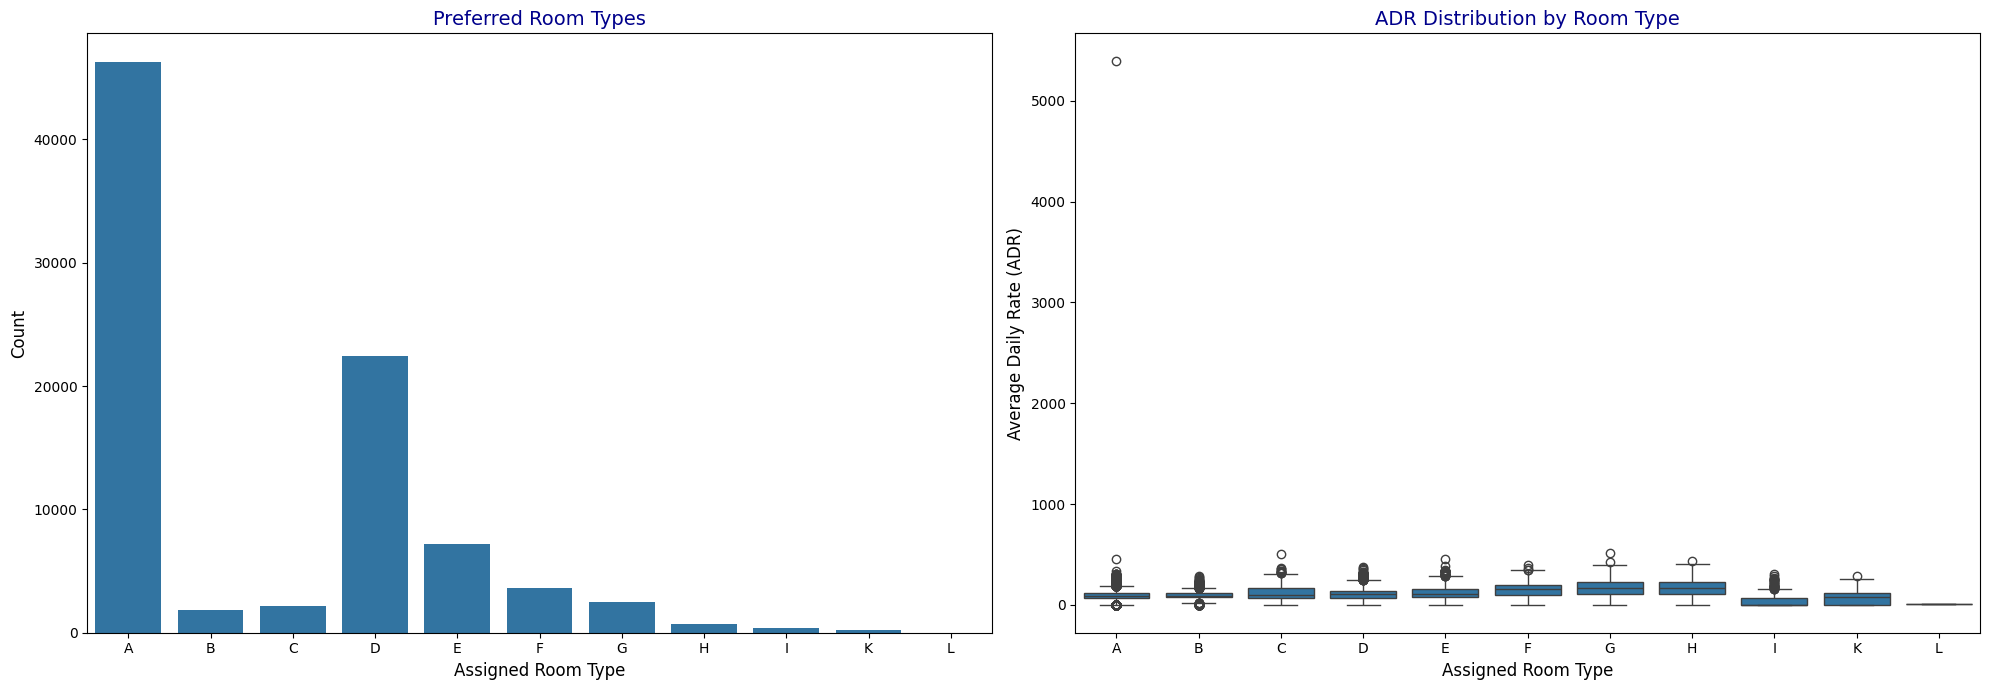

In [195]:
plt.figure(figsize=(20,7))

# Plot 1: Countplot of room types
plt.subplot(1,2,1)
sns.countplot(x="assigned_room_type", data=Hotel_booking_df)
plt.title("Preferred Room Types", fontsize=14, color="darkblue")
plt.xlabel("Assigned Room Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Plot 2: Boxplot of ADR by room type
plt.subplot(1,2,2)
sns.boxplot(x="assigned_room_type", y="adr", data=Hotel_booking_df)
plt.title("ADR Distribution by Room Type",fontsize=14, color="darkblue")
plt.xlabel("Assigned Room Type", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)

plt.tight_layout()
plt.show()




<h6 style="color:darkblue"; >
Room type A and D are most preferred by guests.

but better 'Average daily rate' rooms are of type H,G,F and C.
</h6>

<h3 style="color:darkblue"; >
Stay length in hotels 
</h3>

Text(0.5, 1.0, 'Stay length in hotels')

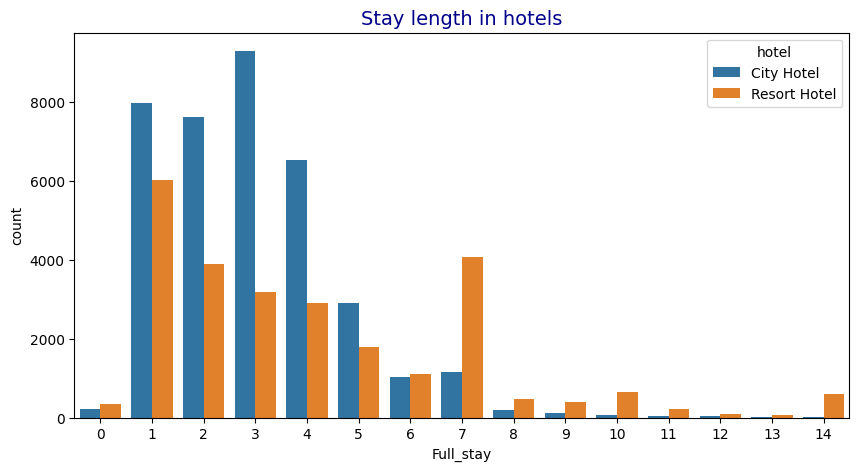

In [196]:
not_canceled = Hotel_booking_df[Hotel_booking_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]         #limiting full stay to less than 15
plt.figure(figsize = (10,5))
sns.countplot(x = s1['Full_stay'], hue = s1['hotel'])
plt.title('Stay length in hotels',fontsize=14, color="darkblue")

<h6 style="color:darkblue"; >
Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.
</h6>

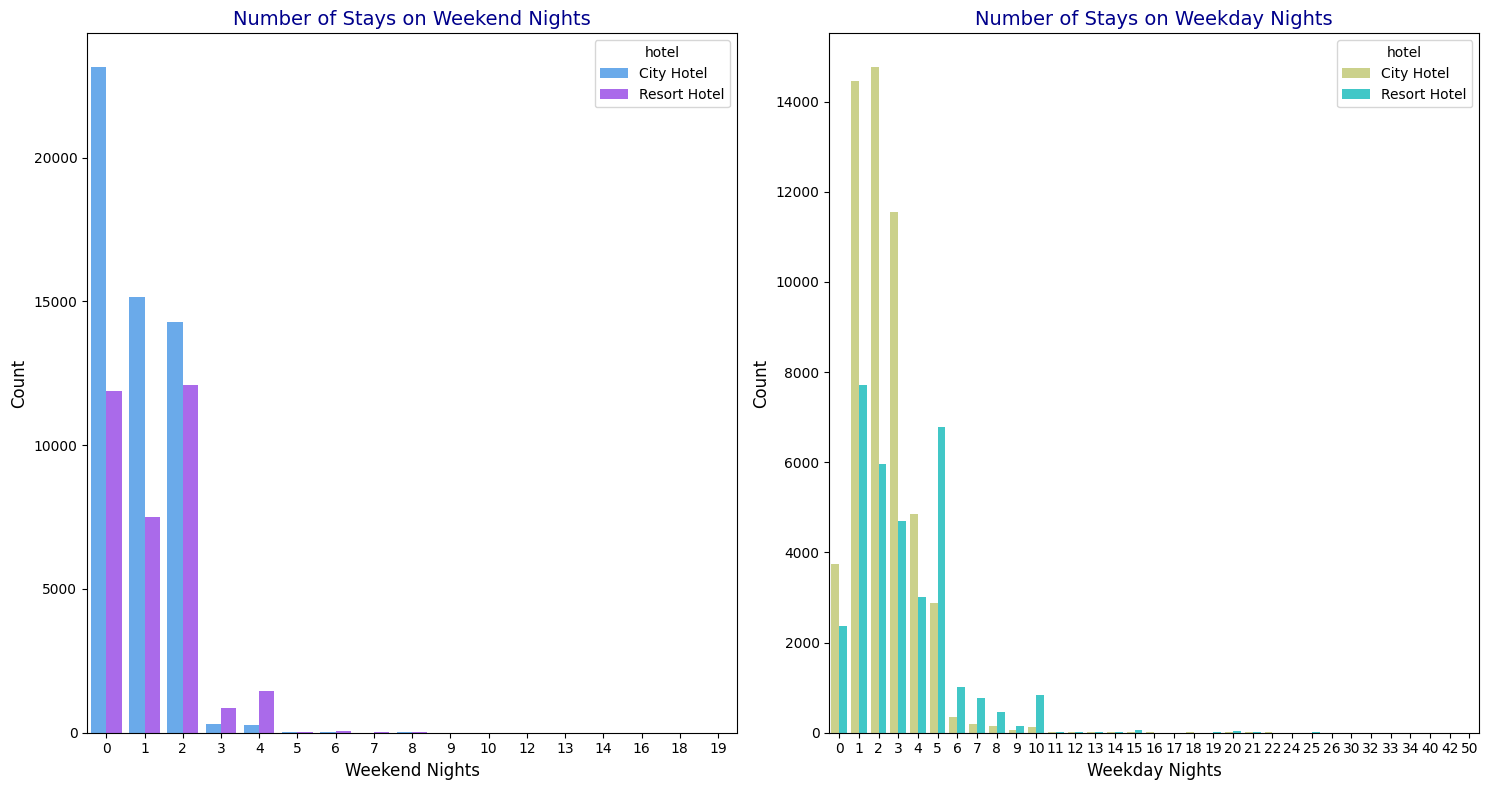

In [197]:
plt.figure(figsize=(15, 8))

# Weekend nights
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights', hue='hotel', data=Hotel_booking_df, palette='cool')
plt.title("Number of Stays on Weekend Nights", fontsize=14, color="darkblue")
plt.xlabel("Weekend Nights", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Weekday nights
plt.subplot(1, 2, 2)
sns.countplot(x='stays_in_week_nights', hue='hotel', data=Hotel_booking_df, palette='rainbow_r')
plt.title("Number of Stays on Weekday Nights", fontsize=14, color="darkblue")
plt.xlabel("Weekday Nights", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()


<h6 style="color:darkblue"; >
City hotels have more number of stays irrespective of week or weekend stays.
</h6>

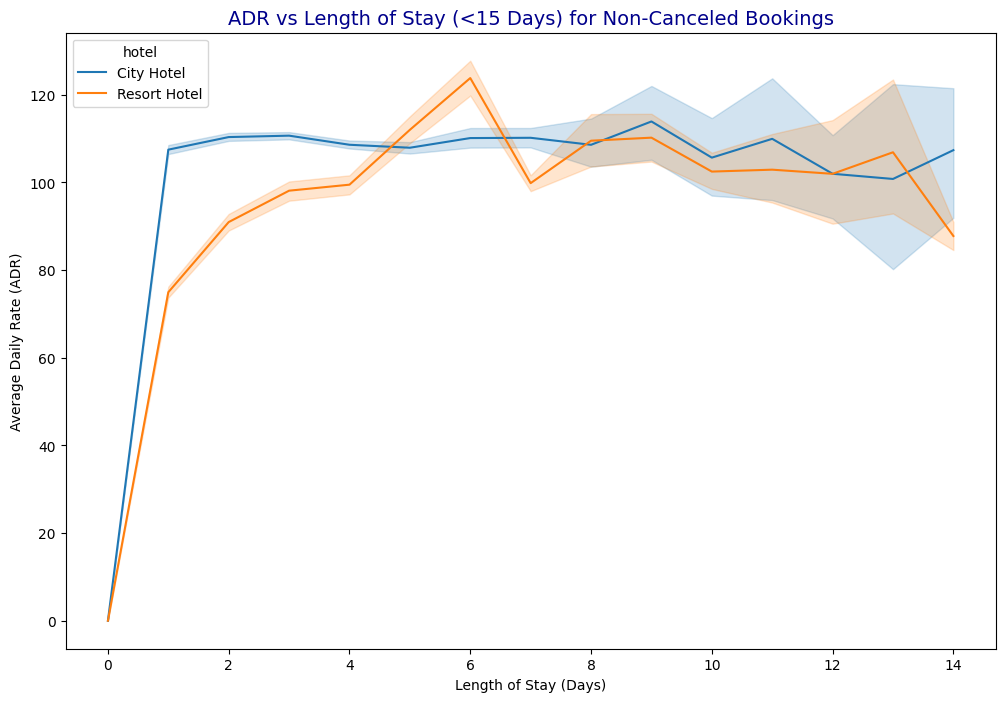

In [198]:
not_canceled = Hotel_booking_df[Hotel_booking_df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['Full_stay'] < 15]        # taking less than 15 days of Full stay

plt.figure(figsize =(12,8))
sns.lineplot(data=s1, x='Full_stay', y='adr', hue='hotel')

plt.title("ADR vs Length of Stay (<15 Days) for Non-Canceled Bookings", fontsize=14, color="darkblue")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()


<h6 style="color:darkblue"; >
After 2 days Average_daily_rate for both the hotels is in range 100 to 130. To get min. Average_daily_rate for resort hotel you should plan a stay of 6-7 days. For city hotels is almost constant. And Average_daily_rate goes down after 14 days(long stay).
</h6>

<h3 style="color:darkblue"; >
Cancellation rates
</h3>

Text(0.5, 1.0, 'Booking preferred with deposite type')

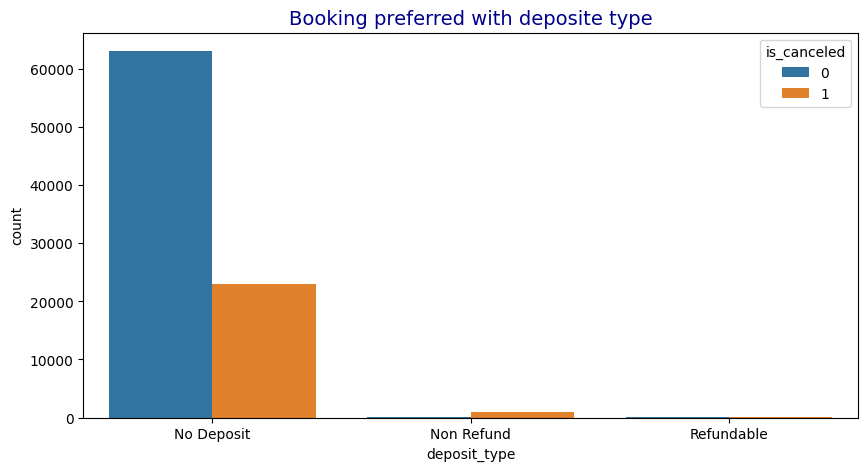

In [199]:
plt.figure(figsize = (10,5))
sns.countplot(x='deposit_type',data=Hotel_booking_df,hue ='is_canceled')
plt.title('Booking preferred with deposite type',fontsize=14, color="darkblue")


<h6 style="color:darkblue"; >
As expected , Most Bookings are done with 'No deposite' and most cancellations are also in 'no deposit' bookings. It is a surprise to see cancellations with 'Non-refundable' bookings
</h6>

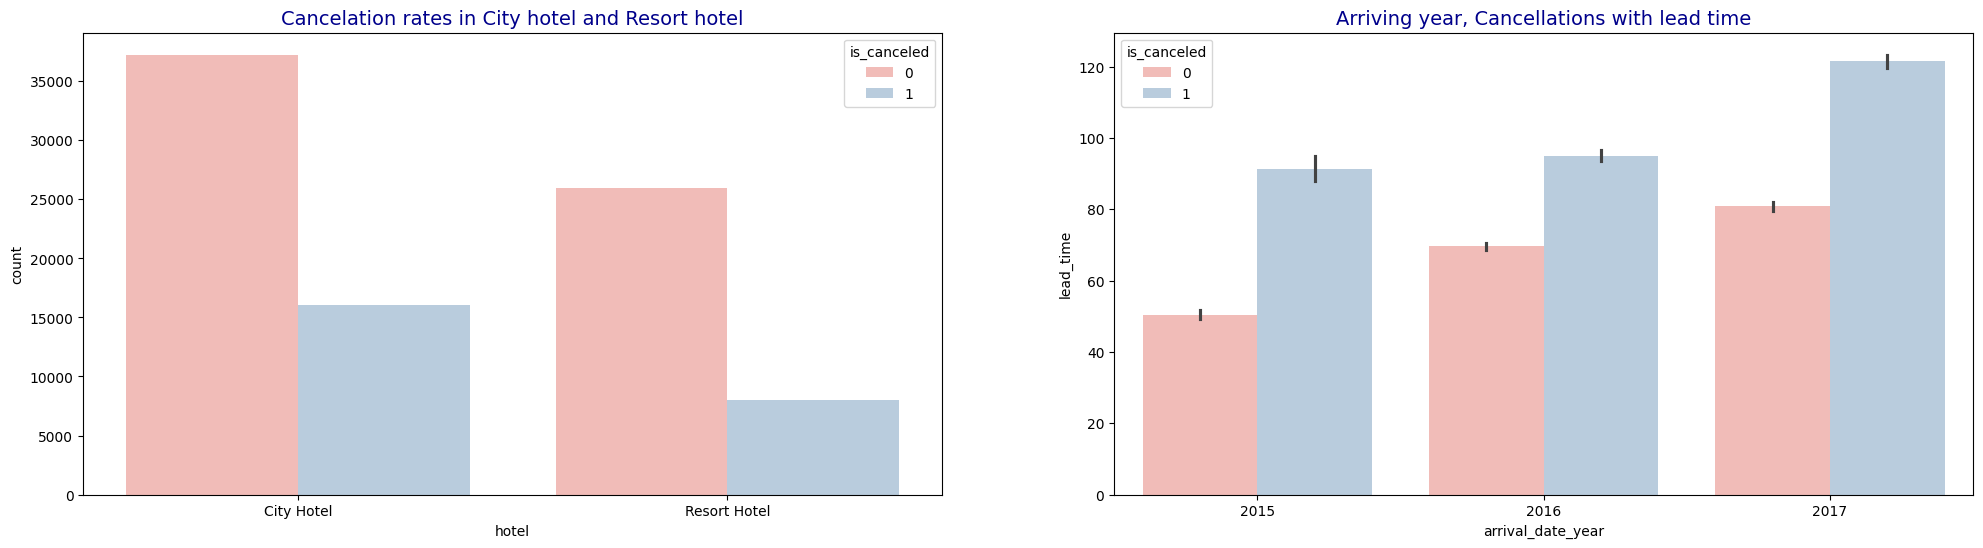

In [200]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1 )
sns.countplot(x='hotel',hue="is_canceled", data=Hotel_booking_df,palette='Pastel1')
plt.title("Cancelation rates in City hotel and Resort hotel",fontsize=14, color="darkblue")
plt.subplot(1,2,2 )
sns.barplot(x='arrival_date_year', y='lead_time',hue='is_canceled', data= Hotel_booking_df, palette='Pastel1')
plt.title('Arriving year, Cancellations with lead time',fontsize=14, color="darkblue")
plt.subplots_adjust(right=1.7)

<h6 style="color:darkblue"; >
Cancelation rate is higher in city hotel. With more lead time there is more possibility of booking cancellation.
City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>

<h3 style="color:darkblue"; >
Waiting time
</h3>

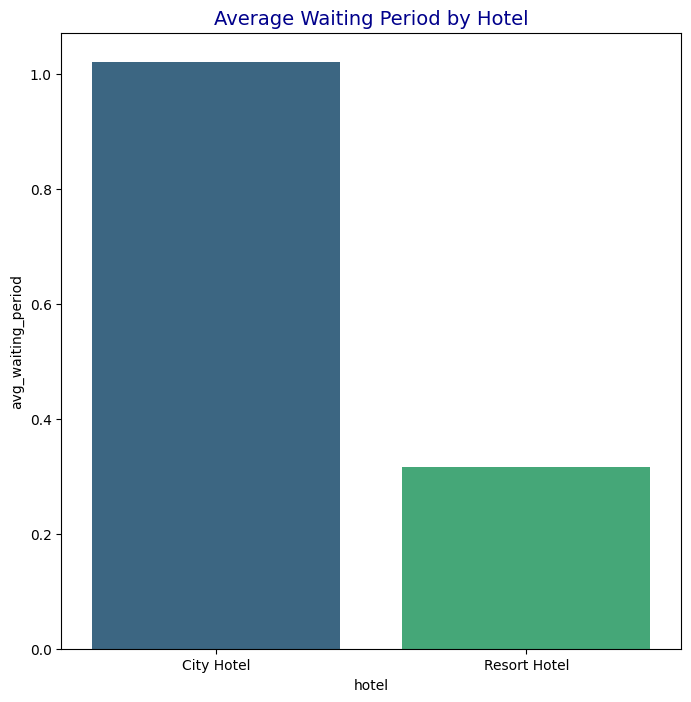

In [201]:
# Group by 'hotel' and calculate mean waiting days
Waiting_df = (
    Hotel_booking_df.groupby('hotel', observed=True)['days_in_waiting_list']
    .mean()
    .reset_index()
    .rename(columns={'days_in_waiting_list': 'avg_waiting_period'})
)

# Plot

plt.figure(figsize=(8, 8))
sns.barplot(
    x="hotel",
    y="avg_waiting_period",
    data=Waiting_df,
    hue="hotel",            # tell seaborn what to color by
    dodge=False,            # bars won’t overlap
    palette="viridis",
    legend=False            # hide duplicate legend
)
plt.title("Average Waiting Period by Hotel", fontsize=14, color="darkblue")
plt.show()



<h6 style="color:darkblue"; >
City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel
</h6>


<h3 style="color:darkblue"; >
Average_daily_rate and price
</h3>

Text(0.5, 1.0, 'Average daily rate month wise')

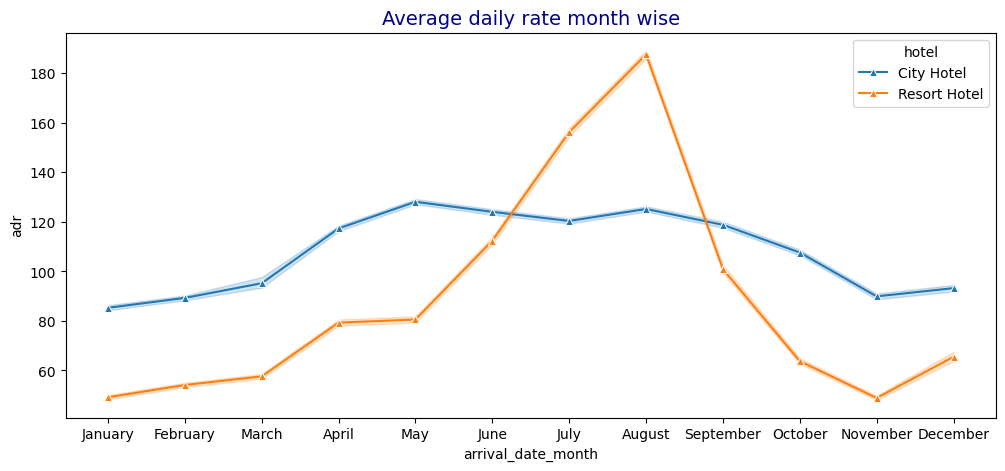

In [202]:
plt.figure(figsize=(12,5))
sns.lineplot(data = Hotel_booking_df, x = 'arrival_date_month', y = 'adr', hue = 'hotel',sort =True, marker ='^')
plt.title('Average daily rate month wise',fontsize=14, color="darkblue")

<h6 style="color:darkblue"; >
For resort hotels, the average daily rate is more expensive during august, july and september.


For city hotels, the average daily rate is more expensive during august, july, june and may
</h6>

<h3 style="color:darkblue"; >
Special Requests
</h3>

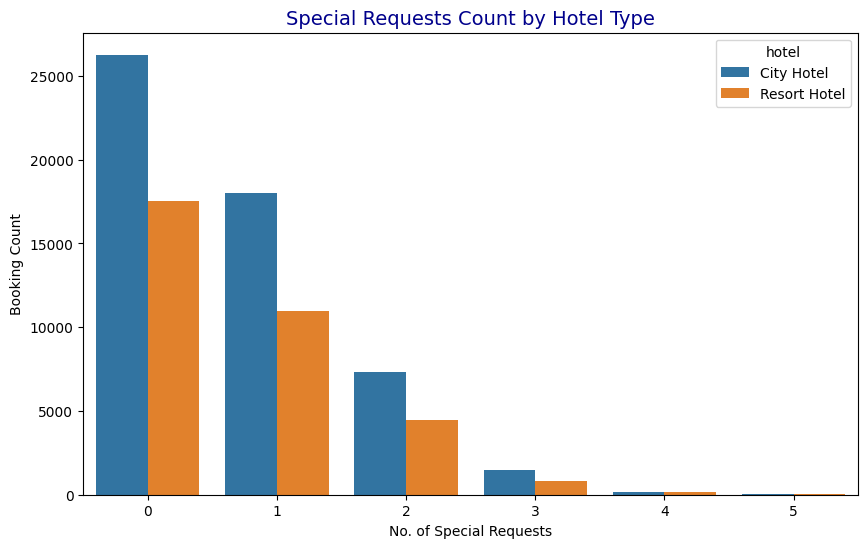

In [203]:
plt.figure(figsize =(10,6))
sns.countplot(data=Hotel_booking_df, x='total_of_special_requests', hue='hotel')
plt.xlabel('No. of Special Requests')
plt.ylabel('Booking Count')
plt.title("Special Requests Count by Hotel Type", fontsize=14, color="darkblue")
plt.show()


<h6 style="color:darkblue"; >
City hotels have more no. of special requests. Most of them ask for only 1 special request
</h6>

<h2 style="color:darkblue; background-color:#eef4ff; padding:10px; border-radius:8px; text-align:center; font-family:Trebuchet MS;">
Conclusion
</h2>

<p style="font-size:15px; color:#333; font-family:Calibri;">
The analysis of the hotel booking dataset highlights key guest behaviors, booking trends, and areas for improvement.  
</p>

<ul style="font-size:14px; color:#444; font-family:Calibri; line-height:1.6;">
  <li><b>Guest Origins:</b> Majority of guests are from <b>Western Europe</b>, so more marketing budget should target those regions.</li>
  <li><b>Hotel Preference:</b> Around <b>61% bookings are for City Hotels</b> and <b>39% for Resort Hotels</b>, making City Hotels the busier option.</li>
  <li><b>Seasonal Trends:</b> Peak months are <b>May-August</b> due to the summer season - strong focus is needed here.</li>
  <li><b>Customer Retention:</b> Very few repeat guests exist. Strategy should include loyalty programs to increase <b>returning customers</b>.</li>
  <li><b>Booking Channels:</b> <b>80% bookings</b> come through <b>TA/TO (Travel Agents/Tour Operators)</b>, which dominates the distribution.</li>
  <li><b>Stay Duration:</b> Most common stay is <b>less than 4 days</b>. Short stays favor <b>City Hotels</b>, while longer stays favor <b>Resort Hotels</b>.</li>
  <li><b>Low-Season Opportunity:</b> <b>November-February</b> has fewer bookings and lower ADR, making it ideal for discounts and promotions.</li>
  <li><b>High-Season Caution:</b> <b>May-August</b> are the busiest months with high demand and rates - travelers who want to avoid crowds should consider off-peak travel.</li>
</ul>

